In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [4]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

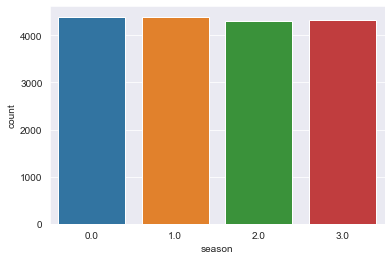

In [5]:
sns.countplot(data=df, x="season");

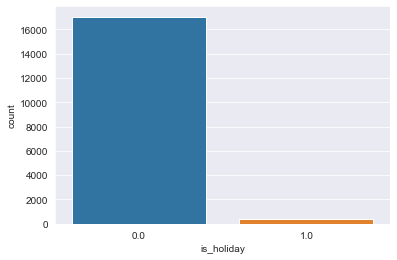

In [6]:
sns.countplot(data=df, x="is_holiday");

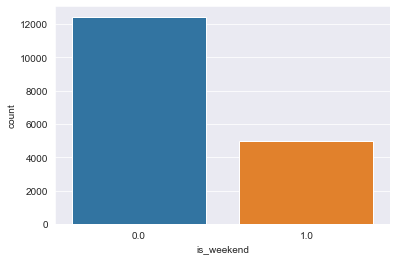

In [7]:
sns.countplot(data=df, x="is_weekend");

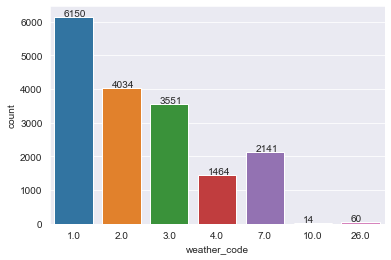

In [8]:
ax = sns.countplot(data=df, x="weather_code");
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.2, p.get_height()+20));

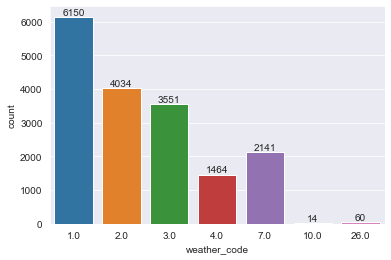

In [9]:
sns.countplot(data=df, x="weather_code");

code= df.weather_code.value_counts().sort_index()
for index, value in enumerate(code):
    plt.text(index, value, str(value), ha="center", va="bottom")

In [10]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [11]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [12]:
#df.timestamp = pd.to_datetime(df.timestamp)
#df.set_index("timestamp", inplace=True)
#df.head()

In [13]:
df['timestamp'] =  df['timestamp'].astype('datetime64[ns]')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [14]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [15]:
df.set_index("timestamp").head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [16]:
# df["year"] = df.index.year
#df["month"] = df.index.month
#df["day"] = df.index.day
#df["day_of_week"] = df.index.dayofweek
#df["hour"] = df.index.hour

#df["year_month"] = df.index.strftime("%Y-%m")
#df.head()

In [64]:
df["year_month"] = pd.to_datetime(df.timestamp).dt.strftime('%m/%Y')
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day_of_month'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,01/2015,2015,1,4,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,01/2015,2015,1,4,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,01/2015,2015,1,4,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,01/2015,2015,1,4,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,01/2015,2015,1,4,6,4


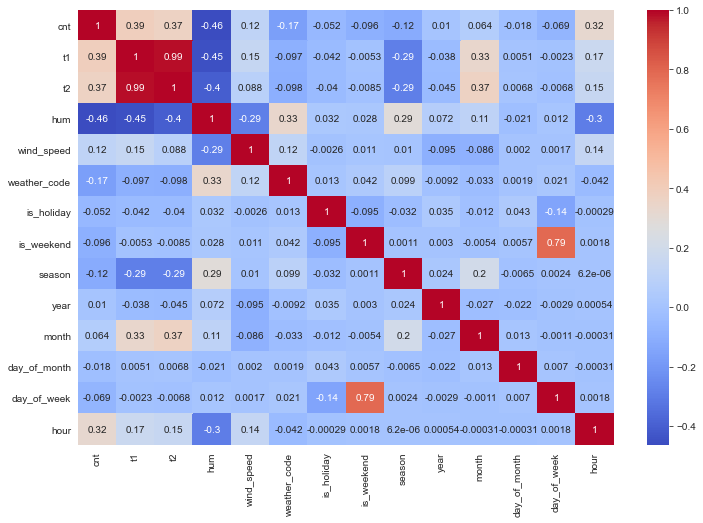

In [44]:
plt.figure(figsize=(12,8))
df_new = df.corr()
sns.heatmap(df_new, cmap="coolwarm", annot=True);

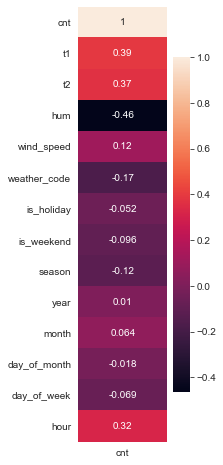

In [46]:
plt.figure(figsize=(2,8))
df_new = df.corr()
sns.heatmap(df_new[["cnt"]], annot=True);

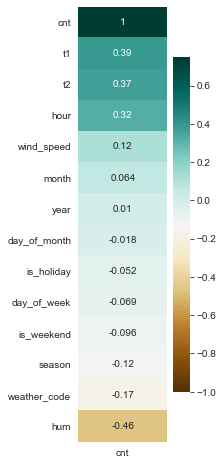

In [50]:
plt.figure(figsize=(2, 8))

df_new1 = df.corr()[["cnt"]]

sns.heatmap(df_new1.sort_values(by='cnt', ascending=False), 
            annot=True, cmap="BrBG", vmin=-1, vmax=0.75);

<Figure size 720x432 with 0 Axes>

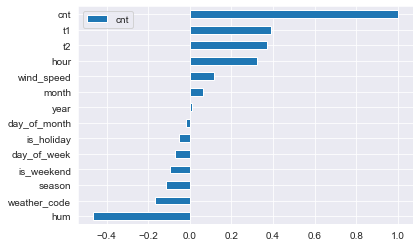

In [53]:
plt.figure(figsize=(10,6))

df.corr()[["cnt"]].sort_values(by= "cnt", ascending=True).plot.barh();

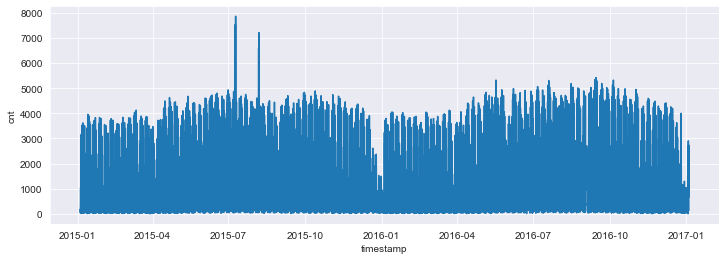

In [21]:
plt.figure(figsize=(12,4))
sns.lineplot(x="timestamp", y="cnt", data=df);

In [71]:
df_sum = pd.DataFrame(df.groupby("year_month").cnt.sum())
df_sum

,cnt
year_month,
01/2015,546639
01/2016,582518
01/2017,37680
02/2015,543594
02/2016,592910
03/2015,695934
03/2016,656527
04/2015,831582
04/2016,768845


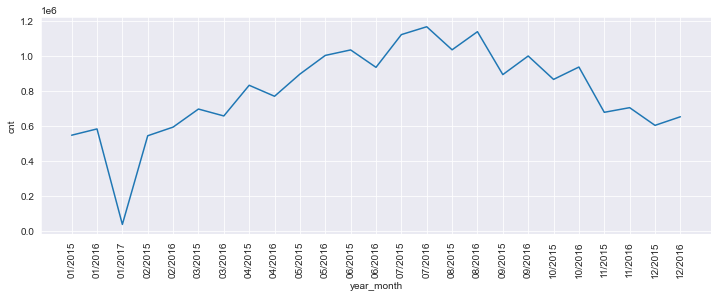

In [72]:
plt.figure(figsize=(12,4))
sns.lineplot(x="year_month", y="cnt", data=df_sum);
plt.xticks(rotation = 90);

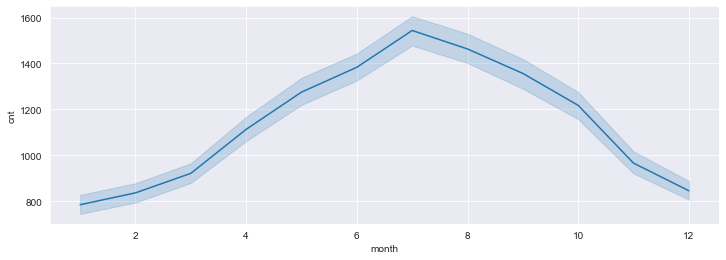

In [23]:
plt.figure(figsize=(12,4))
sns.lineplot(x="month", y="cnt", data=df);

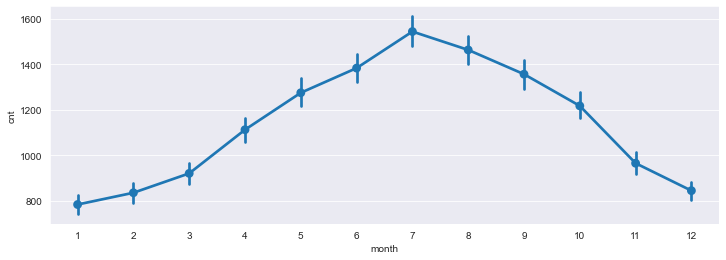

In [24]:
plt.figure(figsize=(12,4))
sns.pointplot(x="month", y="cnt", data=df);


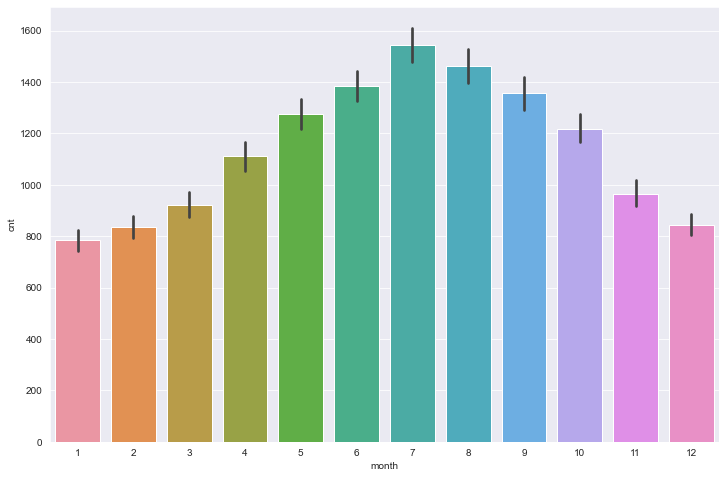

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x="month", y="cnt", data=df);

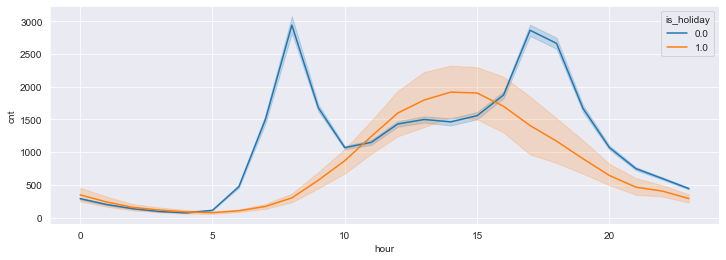

In [26]:
plt.figure(figsize=(12,4))
sns.lineplot(x="hour", y="cnt", data=df, hue = "is_holiday");

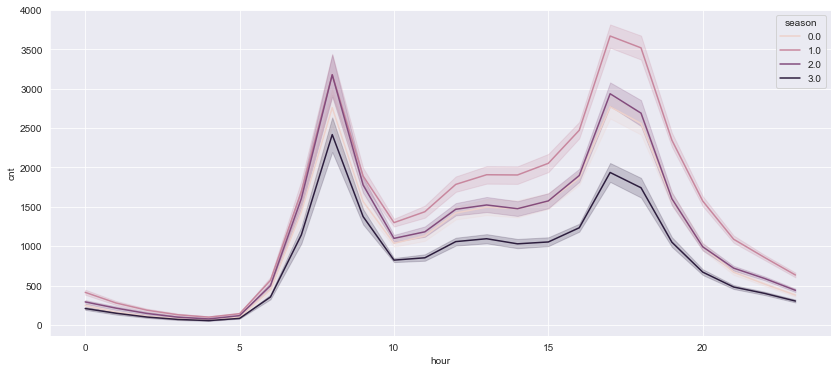

In [27]:
plt.figure(figsize=(14,6))
sns.lineplot(x="hour", y="cnt", data=df, hue = "season");

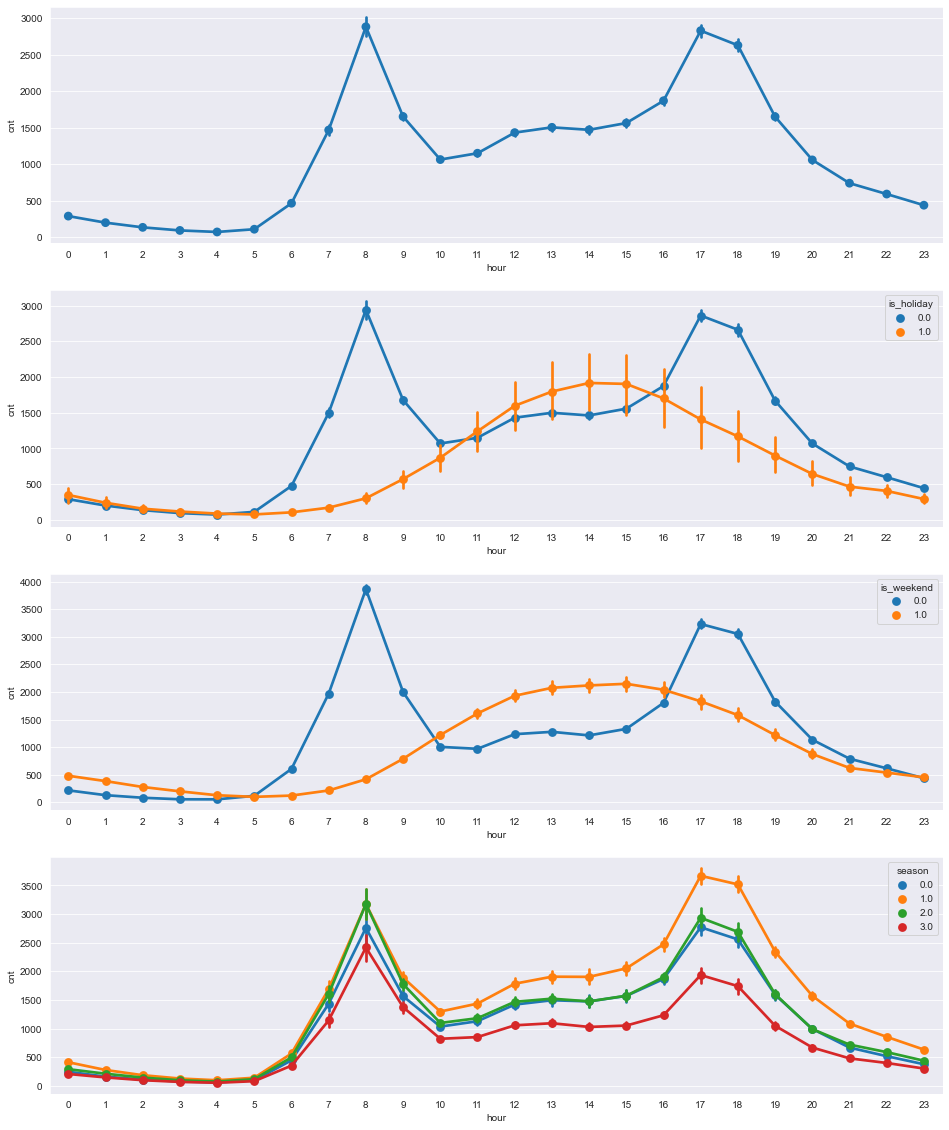

In [28]:

fig, ax= plt.subplots(4,1,figsize=(16,20))
sns.pointplot(x="hour", y="cnt", data=df, ax = ax[0]);
sns.pointplot(x="hour", y="cnt", data=df, hue="is_holiday", ax = ax[1]);
sns.pointplot(x="hour", y="cnt", data=df, hue="is_weekend", ax = ax[2]);
sns.pointplot(x="hour", y="cnt", data=df, hue="season", ax = ax[3]);

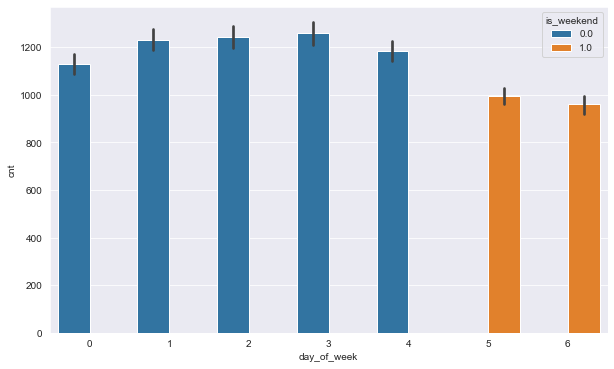

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x="day_of_week", y = "cnt", data=df, hue="is_weekend");

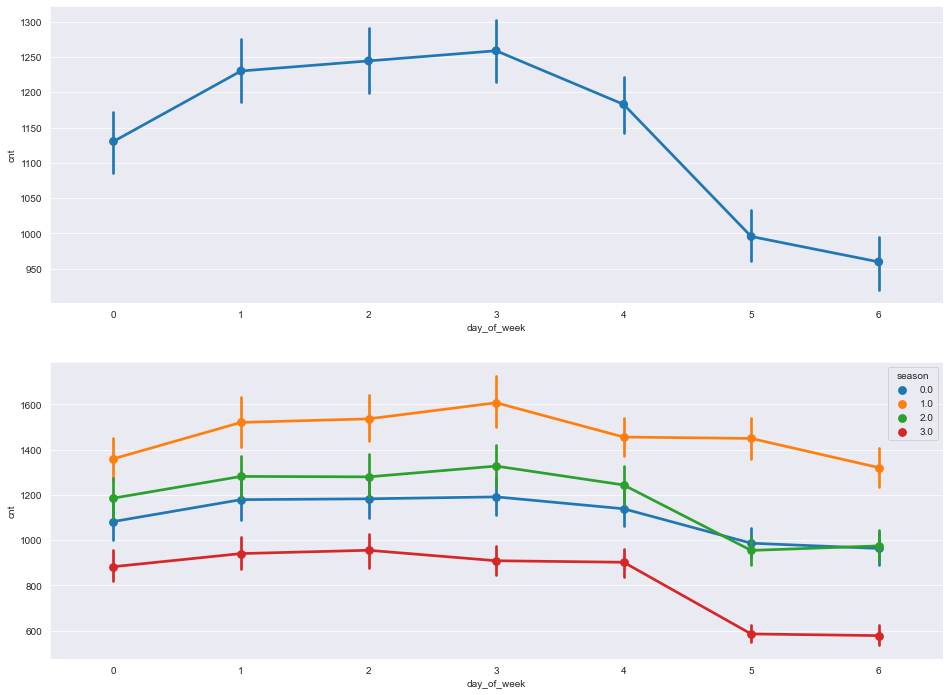

In [74]:
fig, ax= plt.subplots(2,1,figsize=(16,12))
sns.pointplot(x="day_of_week", y = "cnt", data=df, ax = ax[0]);
sns.pointplot(x="day_of_week", y = "cnt", data=df, hue = "season", ax = ax[1]);

In [77]:
pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


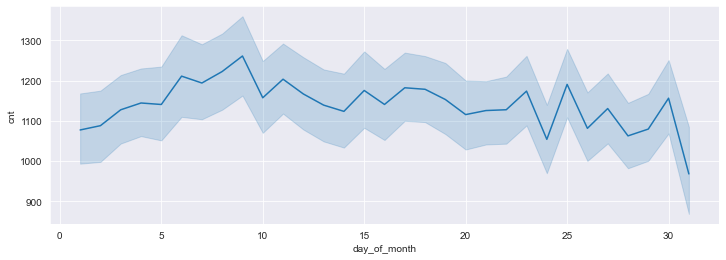

In [80]:
plt.figure(figsize=(12,4))
sns.lineplot(x="day_of_month", y="cnt", data=df);

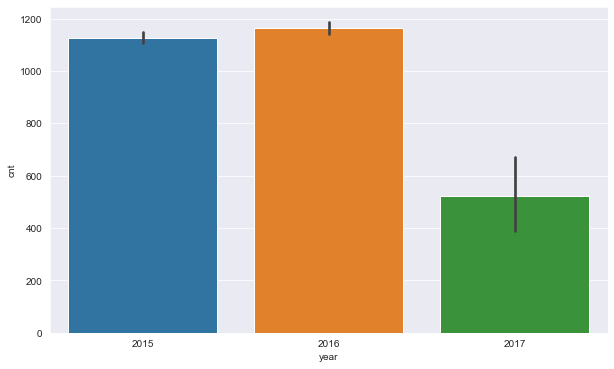

In [33]:
plt.figure(figsize = (10,6))
sns.barplot(x = "year", y = "cnt", data=df);

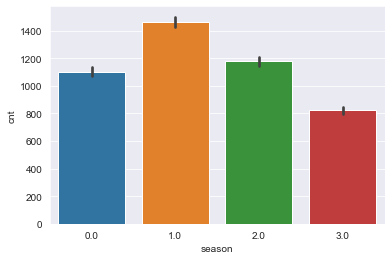

In [34]:
sns.barplot(x = "season", y = "cnt", data=df);

In [35]:
df["is_weekend"].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

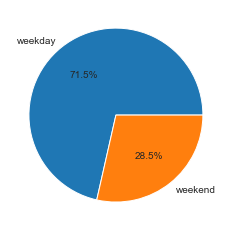

In [86]:
fig, ax = plt.subplots()

ax.pie(df["is_weekend"].value_counts(), labels=["weekday","weekend"], autopct='%1.1f%%');


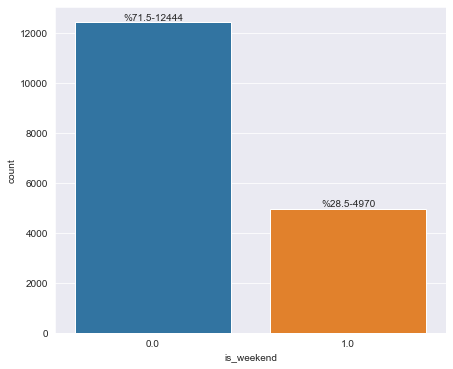

In [87]:
bölüm= df.is_weekend.value_counts().sum()/100
plt.figure(figsize=(7,6))
sns.countplot(data=df, x="is_weekend");
for index, value in enumerate(df.is_weekend.value_counts()):
    plt.text(index, value, f"%{value/bölüm:.3}-{value}", ha="center", va="bottom")

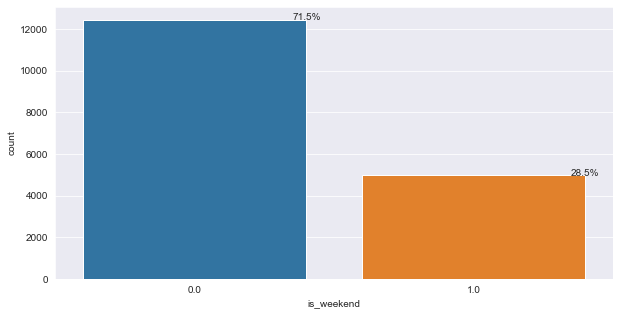

In [38]:
plt.figure(figsize=(10,5))
total = float(len(df))
ax = sns.countplot(data=df, x="is_weekend")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),  ha='center')

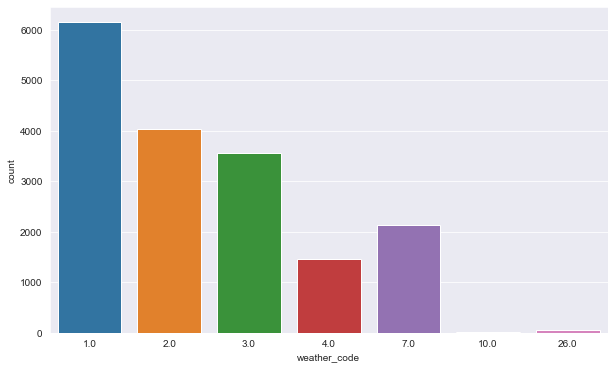

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="weather_code");

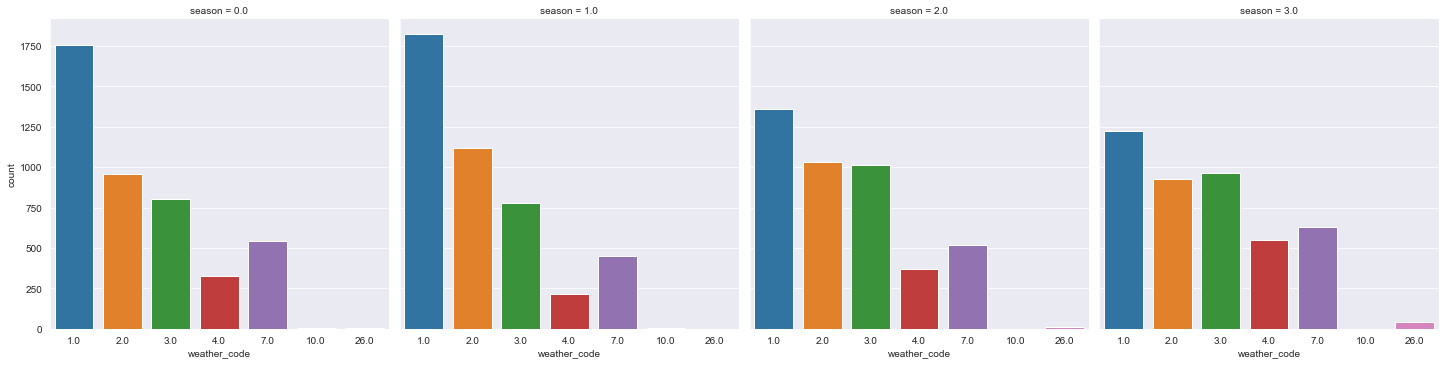

In [40]:
sns.catplot(x="weather_code", col = "season", data=df, kind="count", ci=None);

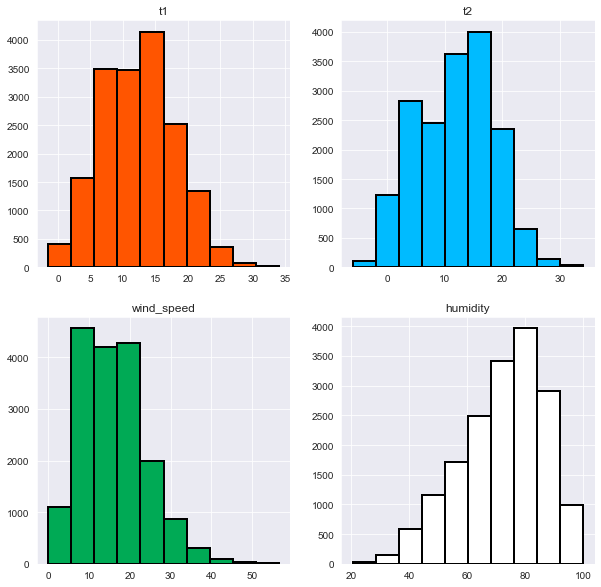

In [91]:
fig, ax =plt.subplots(2,2, figsize=(10,10))

ax[0,0].hist(x="t1", data=df, edgecolor="black", linewidth=2, color="#ff5500")
ax[0,0].set_title("t1")

ax[0,1].hist(x="t2", data=df, edgecolor="black", linewidth=2, color="#00bbff")
ax[0,1].set_title("t2")

ax[1,0].hist(x="wind_speed", data=df, edgecolor="black", linewidth=2, color="#00aa55")
ax[1,0].set_title("wind_speed")

ax[1,1].hist(x="hum", data=df, edgecolor="black", linewidth=2, color="#ffffff")
ax[1,1].set_title("humidity");




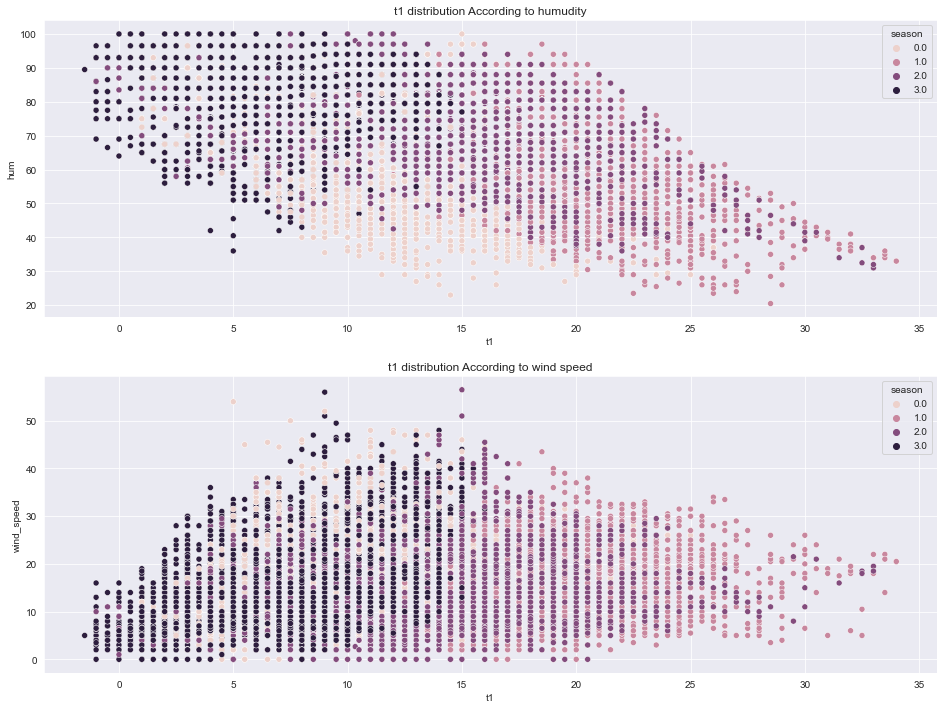

In [42]:
fig, ax =plt.subplots(2, 1, figsize=(16,12))
sns.scatterplot(data = df, x ="t1", y ="hum", hue="season", ax=ax[0]);
sns.scatterplot(data = df, x ="t1", y ="wind_speed", hue="season", ax=ax[1]);
ax[0].set_title("t1 distribution According to humudity")
ax[1].set_title("t1 distribution According to wind speed");
